## Importing Libraries

In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Wine Dataset

In [2]:
from sklearn import datasets

wine = datasets.load_wine()

wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)

In [4]:
df["quality"] = pd.DataFrame(wine.target)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Data Exploration

In [5]:
## 1. info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  quali

In [6]:
## 2.Null

df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
quality                         0
dtype: int64

In [7]:
## 3.Duplicates

df.duplicated().sum()

0

In [8]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## Univariate Analysis

### Checking Data Distribution

Feature:  alcohol


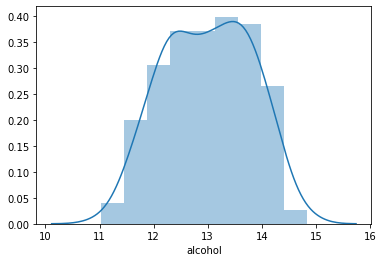

*****************************************************************************************************************************
Feature:  malic_acid


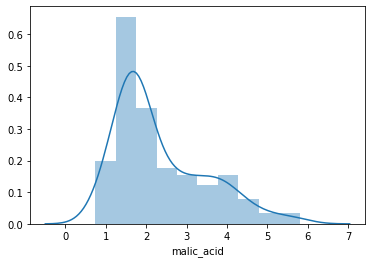

*****************************************************************************************************************************
Feature:  ash


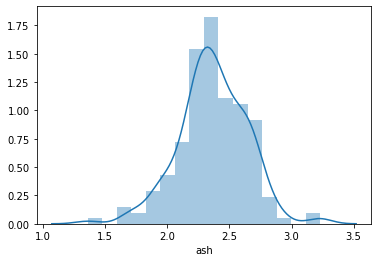

*****************************************************************************************************************************
Feature:  alcalinity_of_ash


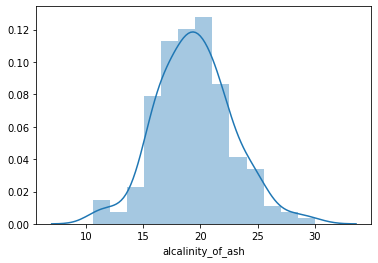

*****************************************************************************************************************************
Feature:  magnesium


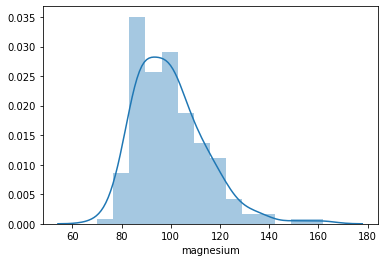

*****************************************************************************************************************************
Feature:  total_phenols


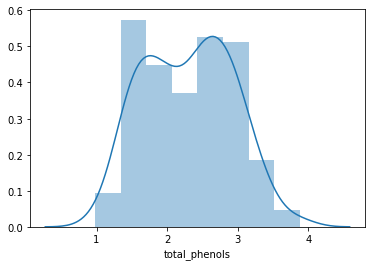

*****************************************************************************************************************************
Feature:  flavanoids


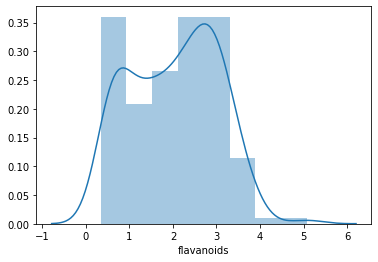

*****************************************************************************************************************************
Feature:  nonflavanoid_phenols


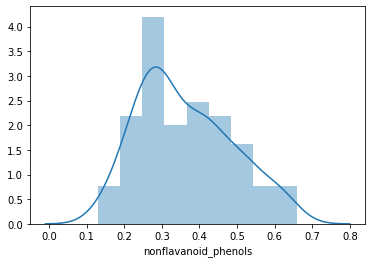

*****************************************************************************************************************************
Feature:  proanthocyanins


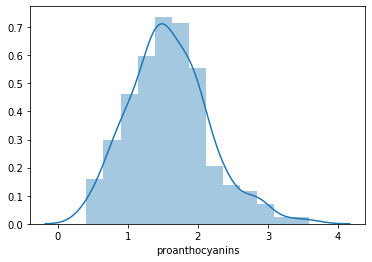

*****************************************************************************************************************************
Feature:  color_intensity


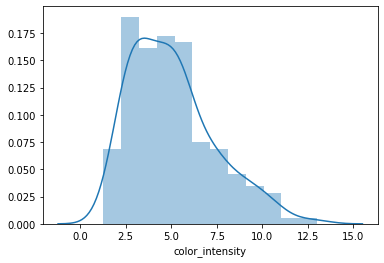

*****************************************************************************************************************************
Feature:  hue


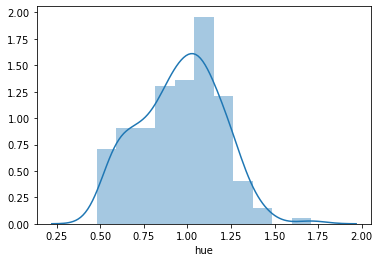

*****************************************************************************************************************************
Feature:  od280/od315_of_diluted_wines


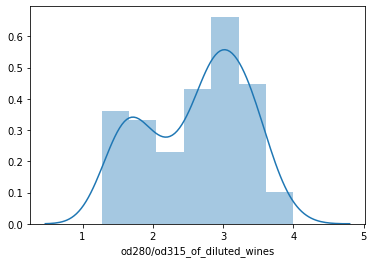

*****************************************************************************************************************************
Feature:  proline


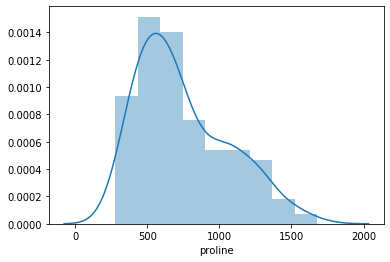

*****************************************************************************************************************************


In [9]:
for col in df.iloc[:,:-1].columns:
    if df[col].dtype != object:
        print("Feature: ", col)
        sns.distplot(df[col])
        plt.show()
        print("*"*125)

Not very skewed data

### Boxplots

Feature:  alcohol


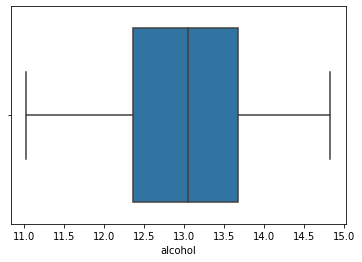

*****************************************************************************************************************************
Feature:  malic_acid


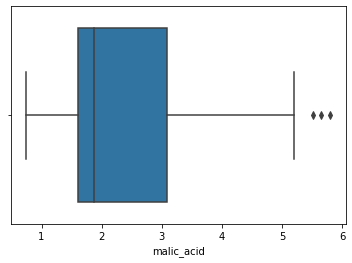

*****************************************************************************************************************************
Feature:  ash


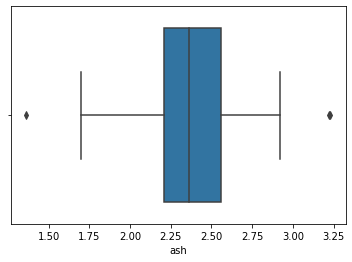

*****************************************************************************************************************************
Feature:  alcalinity_of_ash


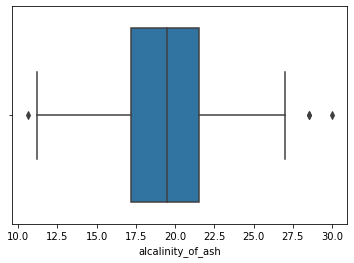

*****************************************************************************************************************************
Feature:  magnesium


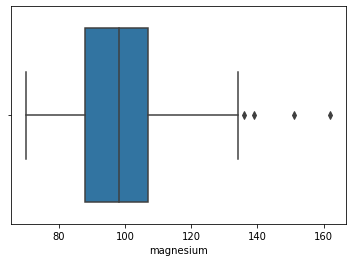

*****************************************************************************************************************************
Feature:  total_phenols


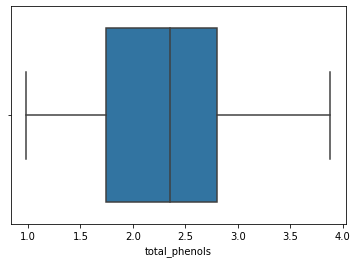

*****************************************************************************************************************************
Feature:  flavanoids


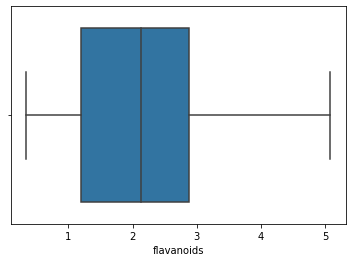

*****************************************************************************************************************************
Feature:  nonflavanoid_phenols


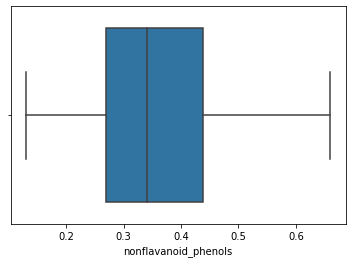

*****************************************************************************************************************************
Feature:  proanthocyanins


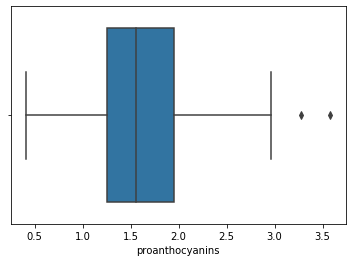

*****************************************************************************************************************************
Feature:  color_intensity


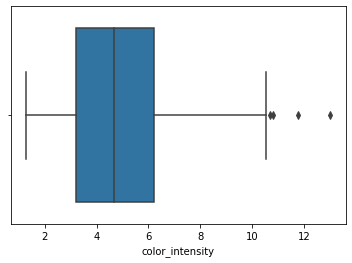

*****************************************************************************************************************************
Feature:  hue


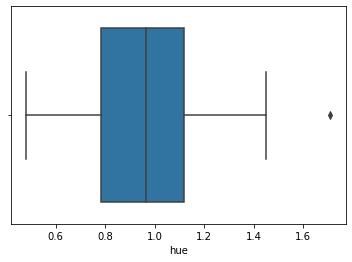

*****************************************************************************************************************************
Feature:  od280/od315_of_diluted_wines


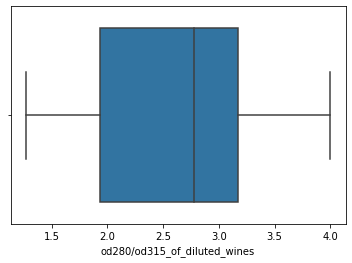

*****************************************************************************************************************************
Feature:  proline


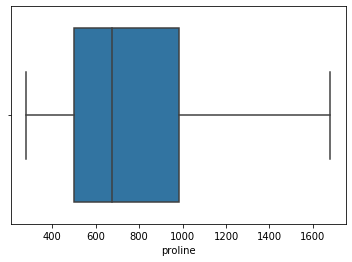

*****************************************************************************************************************************


In [10]:
for col in df.iloc[:,:-1].columns:
    if df[col].dtype != object:
        print("Feature: ", col)
        sns.boxplot(df[col])
        plt.show()
        print("*"*125)

### Treating Outliers

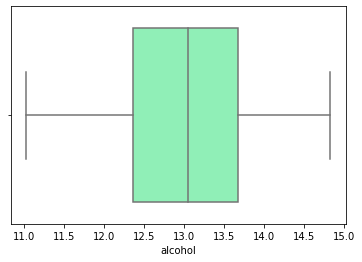

**************************************************************************************************** 




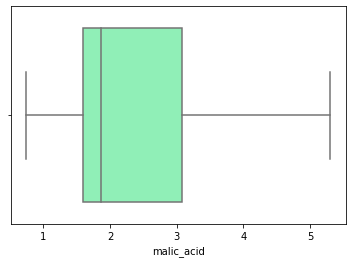

**************************************************************************************************** 




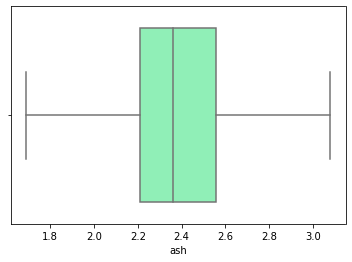

**************************************************************************************************** 




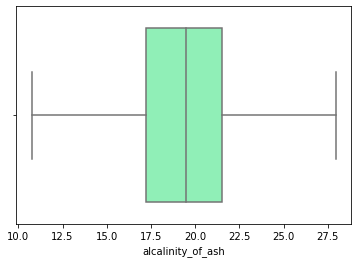

**************************************************************************************************** 




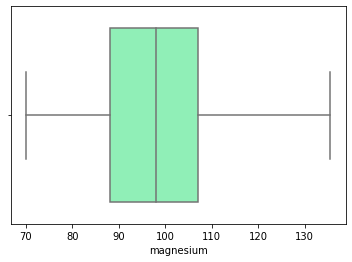

**************************************************************************************************** 




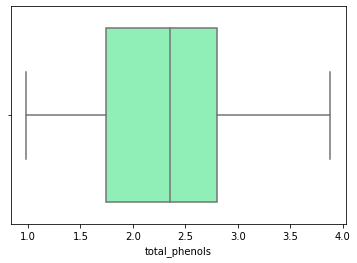

**************************************************************************************************** 




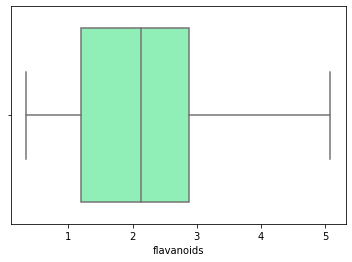

**************************************************************************************************** 




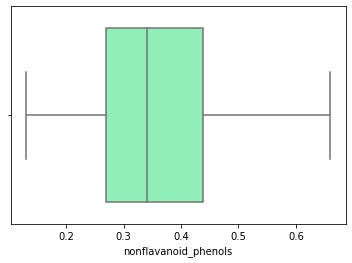

**************************************************************************************************** 




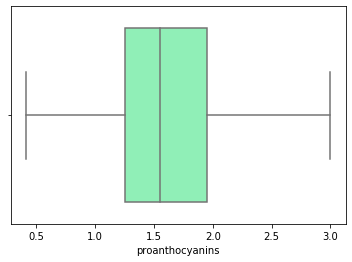

**************************************************************************************************** 




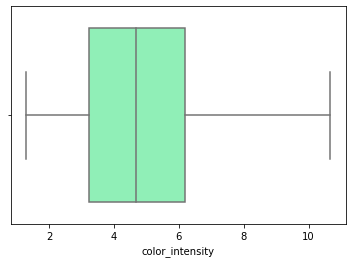

**************************************************************************************************** 




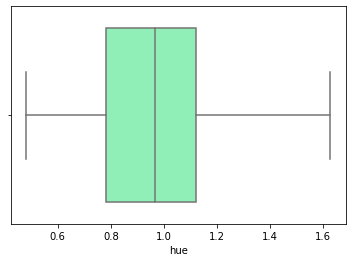

**************************************************************************************************** 




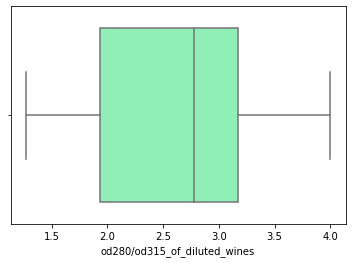

**************************************************************************************************** 




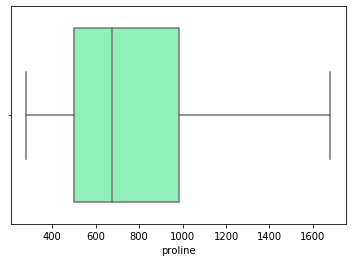

**************************************************************************************************** 




In [11]:
for col in df.iloc[:, :-1].columns:
    if df[col].dtype != object:
        
        q1, q3 = np.percentile(df[col], [25,75])
        
        iqr = q3-q1
        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)
        
        df[col] = df[col].apply(lambda x: upper_fence if x > upper_fence else lower_fence if x< lower_fence else x)
        sns.boxplot(x = df[col], data= df, palette='rainbow', orient='h')
        plt.show()
        print('*'*100, '\n'*2)

### Checking Distribution of Target

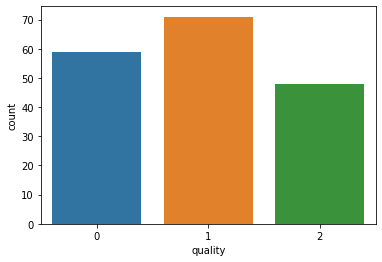

In [12]:
sns.countplot(df["quality"])

Category 2 has least data

## Bivariate Analysis

### Barplots of Variables wrt Target 

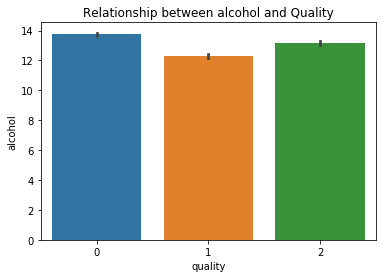

*****************************************************************************************************************************


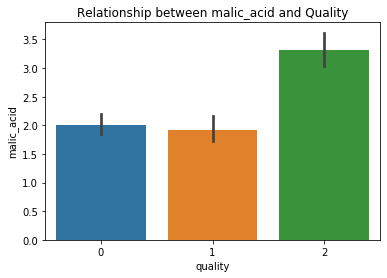

*****************************************************************************************************************************


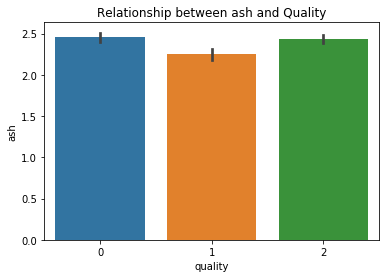

*****************************************************************************************************************************


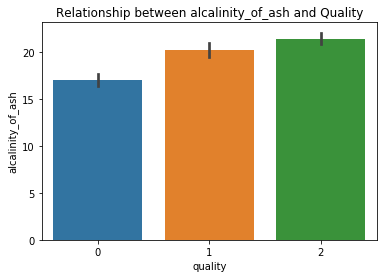

*****************************************************************************************************************************


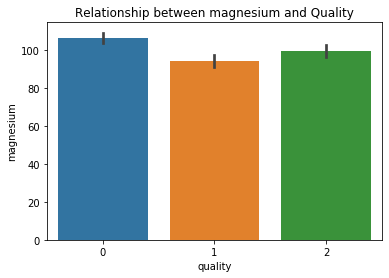

*****************************************************************************************************************************


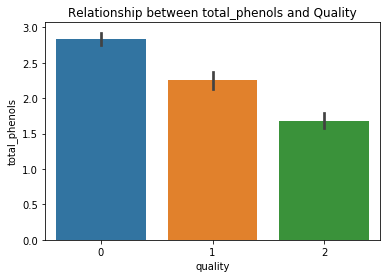

*****************************************************************************************************************************


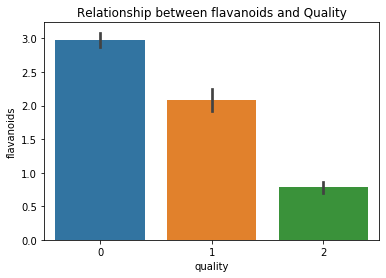

*****************************************************************************************************************************


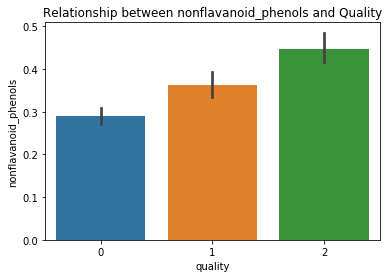

*****************************************************************************************************************************


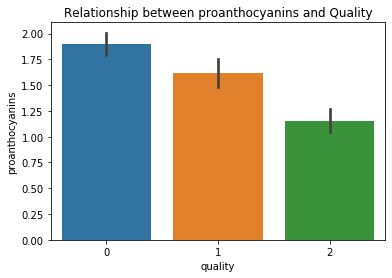

*****************************************************************************************************************************


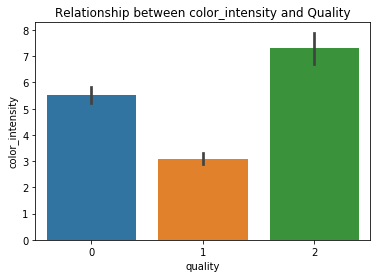

*****************************************************************************************************************************


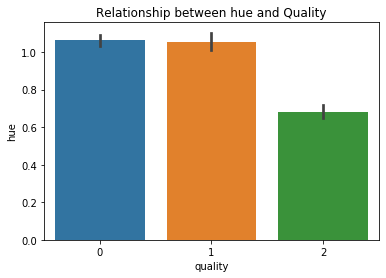

*****************************************************************************************************************************


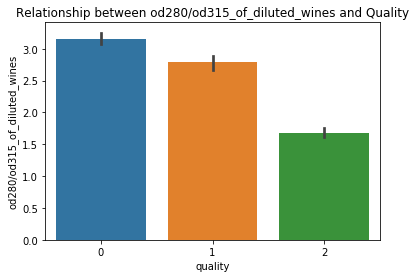

*****************************************************************************************************************************


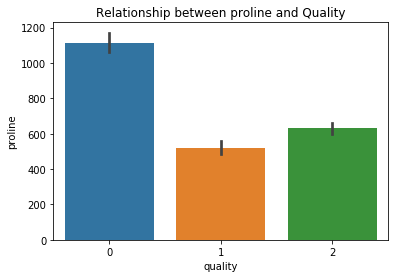

*****************************************************************************************************************************


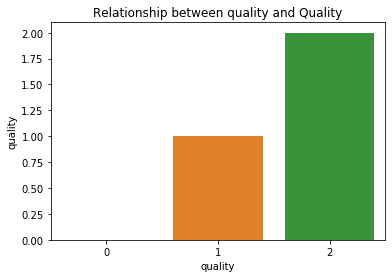

*****************************************************************************************************************************


In [13]:
for col in df.columns:
    if df[col].dtype!= object:
        sns.barplot(x = 'quality',
                   y = df[col],
                   data = df)
        
        plt.title("Relationship between {} and Quality".format(col))
        plt.show()
        print("*"*125)

In [14]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
alcohol,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720,-0.328222
malic_acid,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173,0.440422
ash,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676,-0.047680
alcalinity_of_ash,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700,0.525608
magnesium,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557,-0.224264
total_phenols,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385,0.489109
proanthocyanins,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562,-0.512528
color_intensity,0.549107,0.264897,0.256799,0.009748,0.240505,-0.062101,-0.169807,0.131596,-0.032693,1.000000,-0.520416,-0.430638,0.327100,0.260260


alcohol, ash, magnesium and color intensity have a very low correlation with the target

## Preprocessing

### Scaling the variables

In [15]:
X = df.drop(['quality'], axis = 1)
y = df['quality'] # Target

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [16]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

In [17]:
X = min_max.fit_transform(X)
X[0]

array([0.84210526, 0.21260274, 0.53327338, 0.28197674, 0.87022901,
       0.62758621, 0.57383966, 0.28301887, 0.72586873, 0.46432375,
       0.48854962, 0.97069597, 0.56134094])

### Checking VIF Scores

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

h = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

pd.DataFrame(h, index= df.iloc[:,:-1].columns, columns = ['VIF Score'])

,VIF Score
alcohol,16.197688
malic_acid,4.660086
ash,15.372152
alcalinity_of_ash,14.411014
magnesium,7.802727
total_phenols,23.328404
flavanoids,26.847065
nonflavanoid_phenols,6.869544
proanthocyanins,10.659729
color_intensity,10.165380


There are a large number of variables with very high VIF

Leaving them as such for now

## Model Making

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.1, 
                                                    random_state = 42)

### Bagging

In [20]:
from sklearn.ensemble import BaggingClassifier

from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier()
base_model

DecisionTreeClassifier()

In [21]:
??BaggingClassifier

In [22]:
model =BaggingClassifier(base_estimator=base_model,
                               oob_score=True ,
                              n_estimators=100,
                               verbose=True)

In [23]:
model

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  oob_score=True, verbose=True)

In [24]:
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  oob_score=True, verbose=True)

In [25]:
model.score(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


1.0

In [26]:
y_pred = model.predict(X_test)


y_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1])

In [27]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9444444444444444


### Overfitted Model

## Creating New Model

### Feature Selection

In [28]:
X2 = df.drop(['alcohol', 'ash', 'magnesium','quality'], axis = 1)
y2 = df['quality'] # Target

X2.head()

,malic_acid,alcalinity_of_ash,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.71,15.6,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.78,11.2,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,2.36,18.6,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.95,16.8,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,2.59,21.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [29]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, 
                                                    y2, 
                                                    test_size = 0.15, 
                                                    random_state = 42)

In [30]:
base_model2 = DecisionTreeClassifier()
base_model2

DecisionTreeClassifier()

In [31]:
model2 = BaggingClassifier(base_estimator=base_model2,
                               oob_score=True ,
                              n_estimators=100,
                               verbose=True)

In [32]:
model2.fit(X2_train, y2_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  oob_score=True, verbose=True)

In [33]:
model2.score(X2_train, y2_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


1.0

In [34]:
y2_pred = model2.predict(X2_test)


y2_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1])

In [35]:
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

Accuracy: 0.9629629629629629


### Better test accuracy than the previous one

## New Model

In [36]:
X3 = df.drop(['alcohol', 'ash', 'magnesium','quality'], axis = 1)
y3 = df['quality'] # Target

X3.head()

,malic_acid,alcalinity_of_ash,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.71,15.6,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.78,11.2,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,2.36,18.6,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.95,16.8,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,2.59,21.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [37]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, 
                                                    y3, 
                                                    test_size = 0.15, 
                                                    random_state = 42)

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [5,6,8,9,10,13,14,16,18,20,30,50,70,100],
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5,1.0],
     'max_features':[0.5,1.0]       
             }

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     max_features = 0.5),
                   param_grid)
clf.fit(X3_train, y3_train)

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         max_features=0.5),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_features': [0.5, 1.0],
                         'max_samples': [0.05, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [5, 6, 8, 9, 10, 13, 14, 16, 18, 20,
                                          30, 50, 70, 100]})

In [43]:
print(clf.best_score_)

print(clf.best_params_)

0.9670967741935484
{'base_estimator__max_depth': 4, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 13}


In [44]:
y_pred3 = clf.predict(X3_test)

y_pred3

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1])

In [45]:
print("Accuracy:",metrics.accuracy_score(y3_test, y_pred3))

Accuracy: 0.9629629629629629


### Grid Search CV has given the best results- Neither underfit not overfit